In [62]:
from enum import Enum
from sympy.ntheory import isprime
import matplotlib.pyplot as plt

In [65]:
class Direction(Enum):
    EAST = (1, 0)
    SOUTH = (0, -1)
    WEST = (-1, 0)
    NORTH = (0, 1)
    
def rotate(direction):
    if direction == Direction.EAST: return Direction.NORTH
    if direction == Direction.SOUTH: return Direction.EAST
    if direction == Direction.WEST: return Direction.SOUTH
    if direction == Direction.NORTH: return Direction.WEST

def draw(count):
    
    def initialize_turning_points(max):
        turnings = [1]
        for i in range(max):
            turnings.append(turnings[-1] + int(i/2) + 1)
            if(turnings[-1] > max): break
        return turnings[1:]

    def mark_prime(x, y):
        plt.plot([x], [y], marker='o', markersize=5, color="red")
        
    # Initialization
    turning_points = initialize_turning_points(count)
    direction = Direction.EAST 
    step = 1
    x_coordinates = [0]
    y_coordinates = [0]

    for i in range(count):
        # Rotate in clockwise direction if it is turning point
        if(step in turning_points): direction = rotate(direction)
        
        # Mark as red point if current number is prime
        if isprime(step): mark_prime(x_coordinates[-1], y_coordinates[-1])
            
        # Update x, y points
        x_increment, y_increment = direction.value
        x_coordinates.append(x_coordinates[-1] + x_increment)
        y_coordinates.append(y_coordinates[-1] + y_increment)

        step = step + 1

    plt.axis('equal')
    plt.axis('off')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()

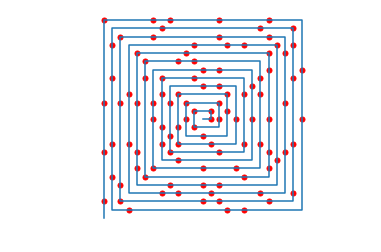

In [73]:
draw(600)